<a href="https://colab.research.google.com/github/Mufabo/robustsp/blob/master/robustsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [57]:
!pip install git+https://github.com/Mufabo/robustsp

  Cloning https://github.com/Mufabo/robustsp to /tmp/pip-req-build-2y8johin
  Running command git clone -q https://github.com/Mufabo/robustsp /tmp/pip-req-build-2y8johin
  Created wheel for robustsp: filename=robustsp-0.1.1-cp37-none-any.whl size=1878962 sha256=c9d4db0e6aa5a390c76b92e332090e891459b2128f4cc25fa30d7ffb793175ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-4uvg6j3o/wheels/bf/ef/3d/0ac54f1ee8ef77de8e42d28033e61795079ebf49f3b5f6223c
Successfully built robustsp


# 01 Location and Scale

## Sensitivity Curve Location

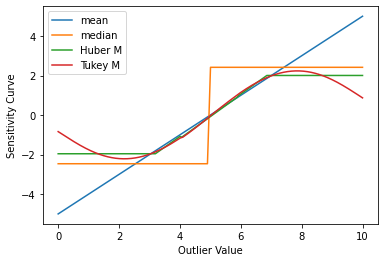

In [ ]:
import numpy as np
import robustsp as rsp
import matplotlib.pyplot as plt
import warnings

# Usually a bad idea, this is just to avoid cluttering the output
warnings.filterwarnings("ignore")

np.random.seed(123)
# number of measurements
N = 100;    
# DC voltage in AWGN
x_N_minus1 = np.random.randn(N-1,1)+5;    
# outlier values
delta_x = np.linspace(0,10,1000);

# sensitivity curve for mean
SC_mean = np.zeros(len(delta_x));
mu_hat = np.mean(x_N_minus1);
for ii in range(len(delta_x)):
    SC_mean[ii] = N*(np.mean(np.append(x_N_minus1, delta_x[ii]))-mu_hat)


# sensitivity curve for median
SC_med = np.zeros(len(delta_x))
mu_hat = np.median(x_N_minus1)
for ii in range(len(delta_x)):
    SC_med[ii] = N*(np.median(np.append(x_N_minus1, delta_x[ii]))-mu_hat)


# sensitivity curve for Huber's location estimator
c =  1.3415;
SC_hub = np.zeros(len(delta_x));
mu_hat = rsp.MLocHUB(x_N_minus1,c);
for ii in range(len(delta_x)):
    SC_hub[ii] = N*(rsp.MLocHUB(np.append(x_N_minus1, delta_x[ii]))-mu_hat)

# sensitivity curve for Tukey's location estimator
c = 4.68; 
SC_tuk = np.zeros(len(delta_x));
mu_hat = rsp.MLocTUK(x_N_minus1,c);
for ii in range(len(delta_x)):
    SC_tuk[ii] = N*(rsp.MLocTUK(np.append(x_N_minus1, delta_x[ii]))-mu_hat)

plt.plot(delta_x, SC_mean-np.mean(SC_mean))
plt.plot(delta_x, SC_med-np.mean(SC_med))
plt.plot(delta_x, SC_hub-np.mean(SC_hub))
plt.plot(delta_x, SC_tuk-np.mean(SC_tuk))
plt.xlabel('Outlier Value')
plt.ylabel('Sensitivity Curve')
leg = plt.legend(('mean', 'median', 'Huber M', 'Tukey M'))

## Sensitivity Curve Scale

In [ ]:
import numpy as np
import robustsp as rsp
import matplotlib.pyplot as plt
import warnings

# Usually a bad idea, this is just to avoid cluttering the output
warnings.filterwarnings("ignore")

np.random.seed(123)
# number of measurements
N = 100;    
# DC voltage in AWGN
x_N_minus1 = np.random.randn(N-1,1)+5;    
# outlier values
delta_x = np.linspace(0,10,1000);

# sensitivity curve for standard deviation
SC_std = np.zeros(len(delta_x));
std_hat = np.std(x_N_minus1, ddof=1);
for ii in range(len(delta_x)):
    SC_std[ii] = N*(np.std(np.append(x_N_minus1, delta_x[ii]), ddof=1)-std_hat)


# Sensitivity Curve for median absolute deviation
# that does not coverge to IF
SC_mad = np.zeros(len(delta_x))
std_hat = rsp.madn(x_N_minus1)
for ii in range(len(delta_x)):
    SC_mad[ii] = N*(rsp.madn(np.append(x_N_minus1, delta_x[ii]))-std_hat)


# Sensitivity Curve for mean absolute deviation
# around the median
SC_mead = np.zeros(len(delta_x));
std_hat = np.mean(np.abs(x_N_minus1-np.median(x_N_minus1)));
for ii in range(len(delta_x)):
    SC_mead[ii] = N*(np.mean(np.append(x_N_minus1, delta_x[ii])-np.median(x_N_minus1))-std_hat)

# Sensitivity Curve for Huber's scale estimate
c =  1.3415
SC_hub = np.zeros(len(delta_x))
std_hat = rsp.MscaleHUB(x_N_minus1, c)
for ii in range(len(delta_x)):
    SC_hub[ii] = N*(np.mean(rsp.MscaleHUB(np.append(x_N_minus1, delta_x[ii]), c))-std_hat)


# sensitivity curve for Tukey's scale estimator
c = 4.68; 
SC_tuk = np.zeros(len(delta_x));
std_hat = rsp.MscaleTUK(x_N_minus1,c);
for ii in range(len(delta_x)):
    SC_tuk[ii] = N*(rsp.MscaleTUK(np.append(x_N_minus1, delta_x[ii]),c)-std_hat)



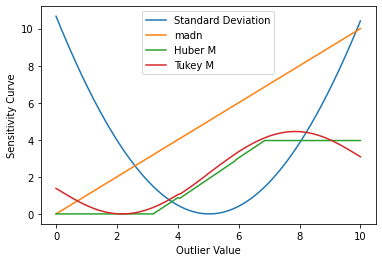

In [ ]:
plt.plot(delta_x, SC_std-np.min(SC_std))
plt.plot(delta_x, SC_mead-np.min(SC_mead))
plt.plot(delta_x, SC_hub-np.min(SC_hub))
plt.plot(delta_x, SC_tuk-np.min(SC_tuk))

plt.xlabel('Outlier Value')
plt.ylabel('Sensitivity Curve')
leg = plt.legend(('Standard Deviation', 'madn', 'Huber M', 'Tukey M'))


# 02 Regression

## Image Example

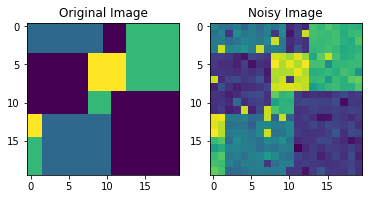

In [ ]:
import matplotlib.pyplot as plt
import os
import robustsp as rsp
import pkgutil
import scipy.io as sio

path = os.path.dirname(rsp.__file__) +'/data/images.mat'
images = sio.loadmat(path)

y20 = images['y20'] # clean image
y20n = images['y20n'] # noisy image

n = len(y20) # 400 pixels

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(y20, [20, 20], order='F'))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(np.reshape(y20n, [20, 20], order='F'))
_ = plt.title('Noisy Image')